<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/Data_Preprocessing_on_our_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


url='https://raw.githubusercontent.com/Prakface/Practice/master/One_mon_present_full.csv'

#url2='https://raw.githubusercontent.com/Prakface/Practice/master/Final_one_month_prev_features.csv'
url2='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonthPrevFeatures2_USER_ID.csv'

url_h='https://raw.githubusercontent.com/Prakface/Practice/master/heuristic_labels.csv'

data = pd.read_csv(url) 

data2= pd.read_csv(url2)

print("Data Shape:", data.shape) 

#data=pd.read_csv(url)

df=pd.DataFrame(data)
print(data.head()) 


data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)


df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(df2['result'])

df_main=df2[df2.columns[~df2.columns.isin(['user_name'])]]

print(df_main.columns)

print(len(df_main.columns))

  
# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes

X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute

#df_1_main=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
df_1_main=df_main[df_main.columns[~df_main.columns.isin(['time', 'Unnamed: 0','tweet_id'])]] #we are retianing result(class label)
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values


print(type(X_1), type(y_1), type(x_1), type(y_1))
print("\n after processing the tcolumns are : \n ", df_1_main.columns)

print(X_1.shape)
print(y_1.shape)


Data Shape: (1908, 40)
  Unnamed: 0 cat1  cat10  ...      tweet_id  url      user_name
0          0    0      0  ...  8.323790e+17  0.0  THEJEROMEOWEN
1          1    0      0  ...  8.323786e+17  0.0       Acejinjo
2          2    0      0  ...  8.323780e+17  0.0     RabRakha21
3          3    0      0  ...  8.323777e+17  0.0       RS_Aloha
4          4    0      0  ...  8.323767e+17  0.0  preciselyizzy

[5 rows x 40 columns]
   Unnamed: 0  cat1  cat10  ...      tweet_id  url        user_name
0           0     0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1           1     0      0  ...  8.323786e+17  0.0         Acejinjo
2           2     0      0  ...  8.323780e+17  0.0       RabRakha21
3           3     0      0  ...  8.323777e+17  0.0         RS_Aloha
4           4     0      0  ...  8.323767e+17  0.0    preciselyizzy
5           5     0      0  ...  8.323759e+17  0.0  thefireistarted

[6 rows x 40 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 

In [0]:
df_1_main.result.value_counts()

0.0    959
1.0    947
Name: result, dtype: int64

In [0]:
df_1_main.drop(['image'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
print("\n for class stress =0")
print(df[df.result == 0.0].head(10))

print(" \nfor class stress =1")
print(df[df.result == 1.0].head(10))



 for class stress =0
    Unnamed: 0 cat1  cat10  ...      tweet_id  url        user_name
947          0    0      0  ...  8.341909e+17  1.0     BadassButton
948          1    0      0  ...  8.341890e+17  0.0     MsBlueShines
949          2    0      0  ...  8.341885e+17  0.0    JaidenGameDev
950          3    0      0  ...  8.341827e+17  0.0        virgocuIt
951          4    0      1  ...  8.341824e+17  0.0  JadeHitchmoughx
952          5    0      0  ...  8.341795e+17  0.0   homoaesthetics
953          6    0      0  ...  8.341761e+17  0.0           4OH1k_
954          7    0      0  ...  8.341760e+17  0.0         hkalechm
955          8    0      0  ...  8.341755e+17  1.0       Rhonddalad
956          9    0      0  ...  8.341715e+17  0.0          iIIsans

[10 rows x 40 columns]
 
for class stress =1
  Unnamed: 0 cat1  cat10  ...      tweet_id  url        user_name
0          0    0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1          1    0      0  ...  8.323786e+17  0.0    

In [0]:
df_1_main['pre_clean_len'] = [len(t) for t in df_1_main.text]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df_1_main.result.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df_1_main.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df_1_main.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df_1_main.shape
}
pprint(data_dict)

{'dataset_shape': (1906, 36),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('float64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


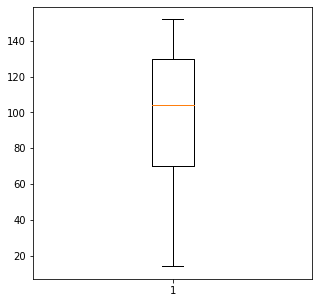

In [0]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df_1_main.pre_clean_len)
plt.show()

In [0]:
df_1_main[df_1_main.pre_clean_len > 140].head(10)

## HTML encoding has not been converted to text in few , and ended up in text field as ‘&amp’,’&quot’,etc and hence text are exceeding 140 character limits !!

,cat1,cat10,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,favorite_count,hour,level,nadj,nadv,nemoji,nlevel,nword,orginal,padj,padv,pemoji,plevel,pnoun,punc1,punc2,punc3,pword,question,result,retweets_count,sarcasm,sentiment,text,url,pre_clean_len
21,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Overpacked flight-luggage falling from overhea...,0.0,143
140,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,@LexARebel_ school just has me stressed out. I...,0.0,143
229,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,If I ever feel like I need 2 check ur phone da...,0.0,143
236,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,15.0,0.0,1.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,-1.0,I'm 18 and going to make mistakes but I won't ...,0.0,144
294,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,"As stressful as my job can be, I stop &amp; th...",0.0,144
320,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,@life_spaces \nThis Flowery corner of my drawi...,1.0,144
391,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,I really feel for Thomas w/ all the hurt &amp;...,0.0,144
416,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,Been so busy I haven't been to the grocery sto...,1.0,144
422,0,3,2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,@kiwi_kali his brother said he's dangerous &am...,0.0,141
430,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Im ignoring my math hw bc I feel like if I try...,0.0,143


In [0]:
df_1_main.text[320]
df_1_main.text[422]

"@kiwi_kali his brother said he's dangerous &amp; people may approach instead of calling police, concerning. I feel for family dad so stressed"

In [0]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df_1_main.text[320], 'lxml')
print(example1.get_text())

@life_spaces 
This Flowery corner of my drawing room.
It bring so much of peace & happiness to me that i feel stres… https://t.co/Lf5tbT888d


In [0]:
##removing @ mentions


In [0]:
#removing urls
import re

#re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

for i in df_1_main.text:
  re.sub('https?://[A-Za-z0-9./]+','',i)



In [0]:
for i in df_1_main.text:
  re.sub("[^a-zA-Z]", " ", i)

In [0]:
## Combined pre-processing functions

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [0]:
#nums = [0,400000,800000,1200000,1600000]
nums = [0,400,800,1200,1600, 1800, 2000]
total=1906
print("\n Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(total):
    if( (i+1)%100 == 0 ):
      print("Tweets %d of %d has been processed" % ( i+1, total))                                                                   
    clean_tweet_texts.append(tweet_cleaner_updated(df_1_main['text'][i]))



 Cleaning and parsing the tweets...

Tweets 100 of 1906 has been processed
Tweets 200 of 1906 has been processed
Tweets 300 of 1906 has been processed
Tweets 400 of 1906 has been processed
Tweets 500 of 1906 has been processed
Tweets 600 of 1906 has been processed
Tweets 700 of 1906 has been processed
Tweets 800 of 1906 has been processed
Tweets 900 of 1906 has been processed
Tweets 1000 of 1906 has been processed
Tweets 1100 of 1906 has been processed
Tweets 1200 of 1906 has been processed
Tweets 1300 of 1906 has been processed
Tweets 1400 of 1906 has been processed
Tweets 1500 of 1906 has been processed
Tweets 1600 of 1906 has been processed
Tweets 1700 of 1906 has been processed
Tweets 1800 of 1906 has been processed
Tweets 1900 of 1906 has been processed


In [0]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df_1_main.result
print(clean_df.head())
print(clean_df.tail())


                                                text  target
0  feel like coming out in stress rash can not do...     1.0
1  it just how feel he seems dangerous to my heal...     1.0
2  can feel your stress through this tweet do som...     1.0
3  these past few weeks have worn on me however d...     1.0
4  my life right now nothing in particular is goi...     1.0
                                                   text  target
1901  closed my eyes while listening to this and act...     0.0
1902  feel relaxed only when study very keenly and t...     0.0
1903  soothingsunday feel relaxed just watching this...     0.0
1904  for the first time in idk how long actually re...     0.0
1905  this little getaway was exactly what needed fe...     0.0


In [0]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,feel like coming out in stress rash can not do...,1.0
1,it just how feel he seems dangerous to my heal...,1.0
2,can feel your stress through this tweet do som...,1.0
3,these past few weeks have worn on me however d...,1.0
4,my life right now nothing in particular is goi...,1.0


In [0]:
##To download the csv 
from google.colab import files
files.download('clean_tweet.csv') 


In [0]:
my_df.info()
#to see if there are any null values or NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 2 columns):
text      1906 non-null object
target    1906 non-null float64
dtypes: float64(1), object(1)
memory usage: 44.7+ KB


In [0]:
print(my_df[my_df.isnull().any(axis=1)].head())
print(np.sum(my_df.isnull().any(axis=1)))

Empty DataFrame
Columns: [text, target]
Index: []
0


In [0]:
my_df.isnull().any(axis=0)

text      False
target    False
dtype: bool

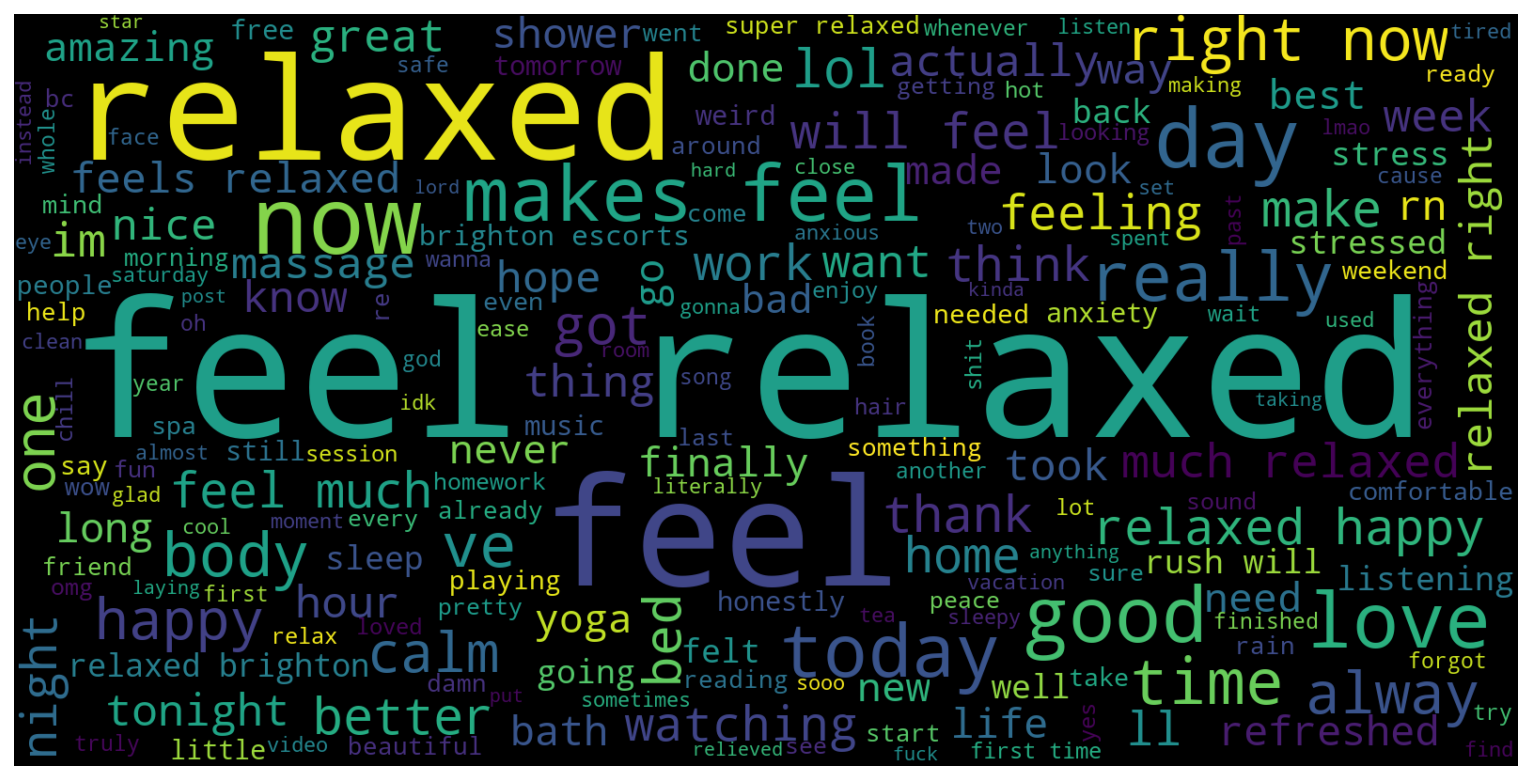

In [0]:
###WORD CLOUD For stress negative tweets (which have no stress)
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

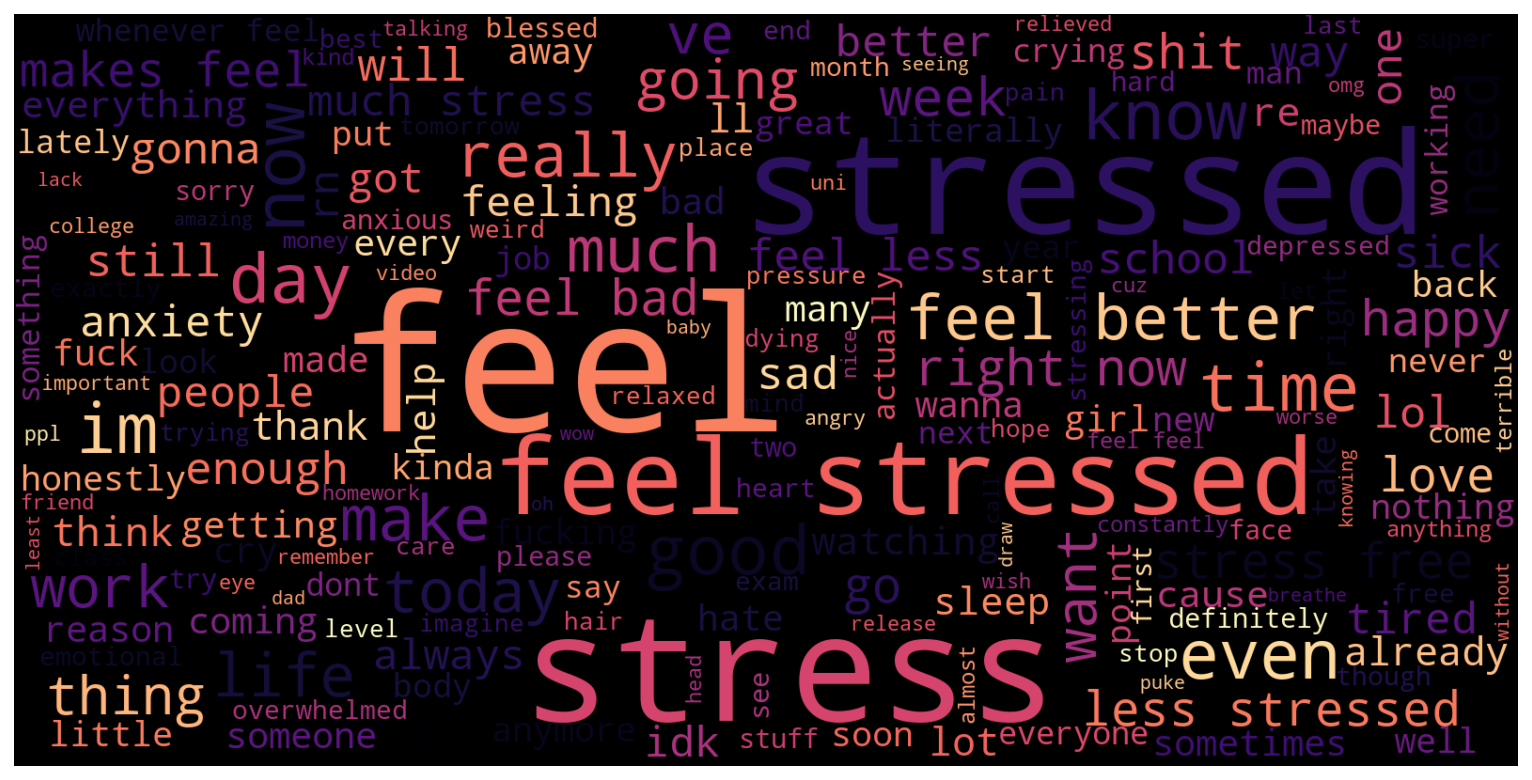

In [0]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600,
                      height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()



In [0]:
##More data visualization

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
len(cvec.get_feature_names())



3769

In [0]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [0]:
document_matrix = cvec.transform(my_df.text)


## checking for stress positive tweets

print(my_df[my_df.target == 1].head())
print(my_df[my_df.target == 1].tail())


                                                text  target
0  feel like coming out in stress rash can not do...     1.0
1  it just how feel he seems dangerous to my heal...     1.0
2  can feel your stress through this tweet do som...     1.0
3  these past few weeks have worn on me however d...     1.0
4  my life right now nothing in particular is goi...     1.0
                                                  text  target
942  liked video tre tension stress trauma release ...     1.0
943  feel stressed thinking abt the possibility of ...     1.0
944  just still not handling class stress gr but wo...     1.0
945  feel like should be super stressed planning we...     1.0
946  feel panic attack coming and never been so str...     1.0


In [0]:
#measuring time for computing count vectors for positive tweets

%%time
pos_batches = np.linspace(0,946,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

9 entries' term freuquency calculated
105 entries' term freuquency calculated
200 entries' term freuquency calculated
296 entries' term freuquency calculated
391 entries' term freuquency calculated
487 entries' term freuquency calculated
582 entries' term freuquency calculated
678 entries' term freuquency calculated
774 entries' term freuquency calculated
869 entries' term freuquency calculated
946 entries' term freuquency calculated
CPU times: user 28.8 ms, sys: 17.8 ms, total: 46.6 ms
Wall time: 53.2 ms


In [0]:
#For negatiove stress tweets
print(my_df[my_df.target == 0].head())
print(my_df[my_df.target == 0].tail())


                                                  text  target
947  definitely feel calmer and more relaxed after ...     0.0
948     listing to lorde and playing sims feel relaxed     0.0
949  tone as in how does the work environment feel ...     0.0
950  finished hw early and feel too relaxed rn some...     0.0
951  literally just had thee best massage feel so r...     0.0
                                                   text  target
1901  closed my eyes while listening to this and act...     0.0
1902  feel relaxed only when study very keenly and t...     0.0
1903  soothingsunday feel relaxed just watching this...     0.0
1904  for the first time in idk how long actually re...     0.0
1905  this little getaway was exactly what needed fe...     0.0


In [0]:
##Measuring time for computing count vectors for negative stress tweets

%%time 
neg_batches = np.linspace(947,1906,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
      print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

956 entries' term freuquency calculated
1053 entries' term freuquency calculated
1150 entries' term freuquency calculated
1247 entries' term freuquency calculated
1344 entries' term freuquency calculated
1441 entries' term freuquency calculated
1537 entries' term freuquency calculated
1634 entries' term freuquency calculated
1731 entries' term freuquency calculated
1828 entries' term freuquency calculated
1906 entries' term freuquency calculated
CPU times: user 29 ms, sys: 4.07 ms, total: 33.1 ms
Wall time: 30.9 ms


In [0]:
#Computing term frequency

neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aaa,0,1
abbey,0,1
abby,1,0
abi,1,0
able,4,4


In [0]:
term_freq_df.columns = ['stress_negative', 'stress_positive']
term_freq_df['total'] = term_freq_df['stress_negative'] + term_freq_df['stress_positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,stress_negative,stress_positive,total
feel,941,911,1852
and,520,453,973
relaxed,957,8,965
so,476,354,830
to,308,412,720
the,316,327,643
stressed,15,549,564
not,177,318,495
it,227,256,483
my,238,239,477


In [0]:
print(np.sum([[0, 1], [0, 5], [1,3]], axis=0))
print(np.sum([[0, 1], [0, 5], [1,3]], axis=1))


[1 9]
[1 5 4]


Text(0.5, 1.0, 'Top 500 tokens in tweets')

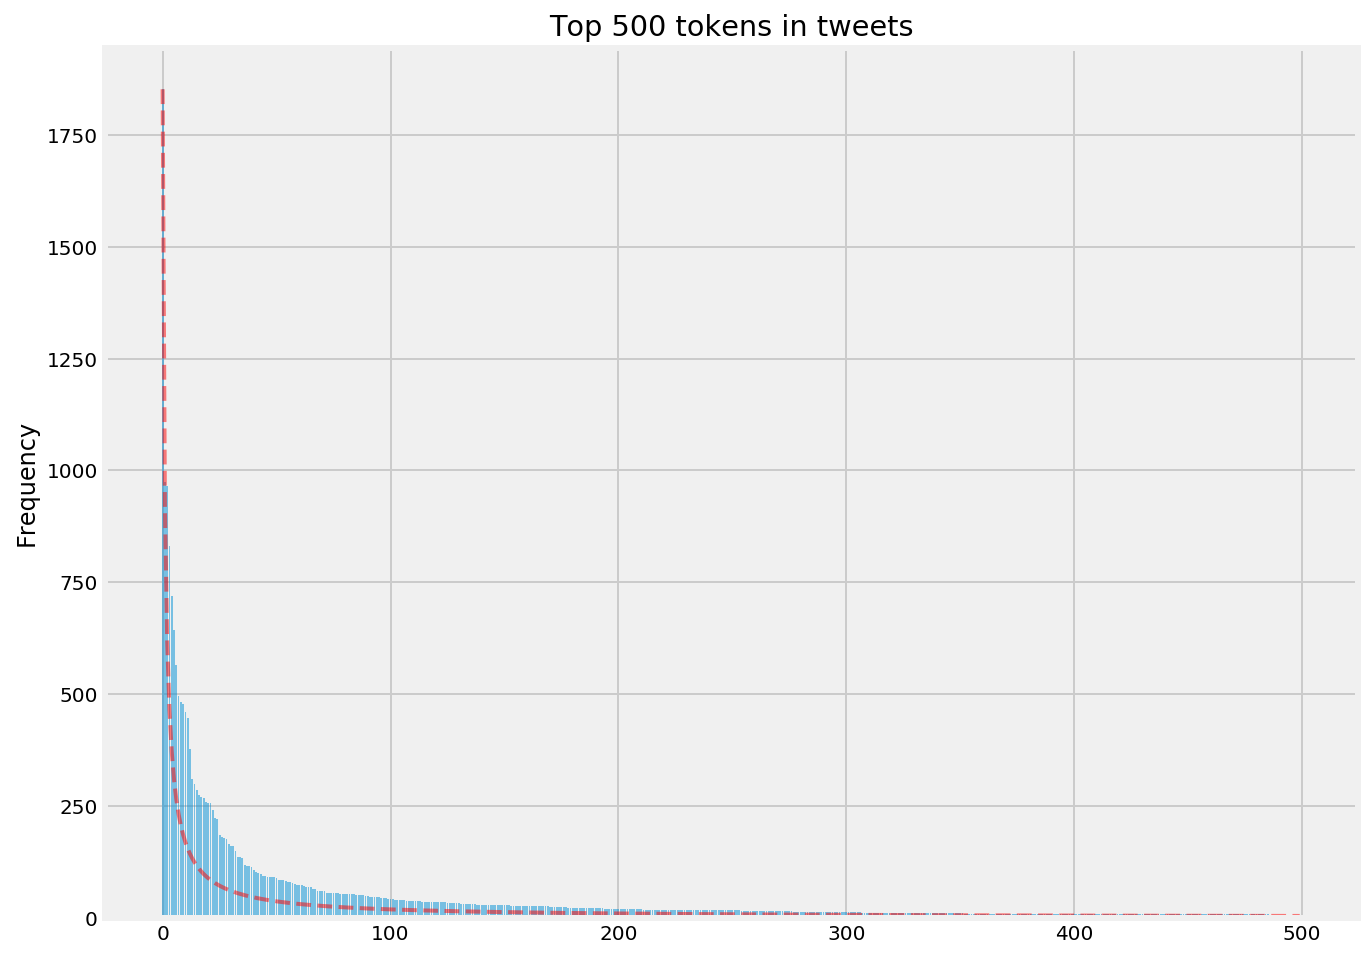

In [0]:
#Verifying Zipf's law frequency inversely proportional to rank (or rank power alpha)

y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

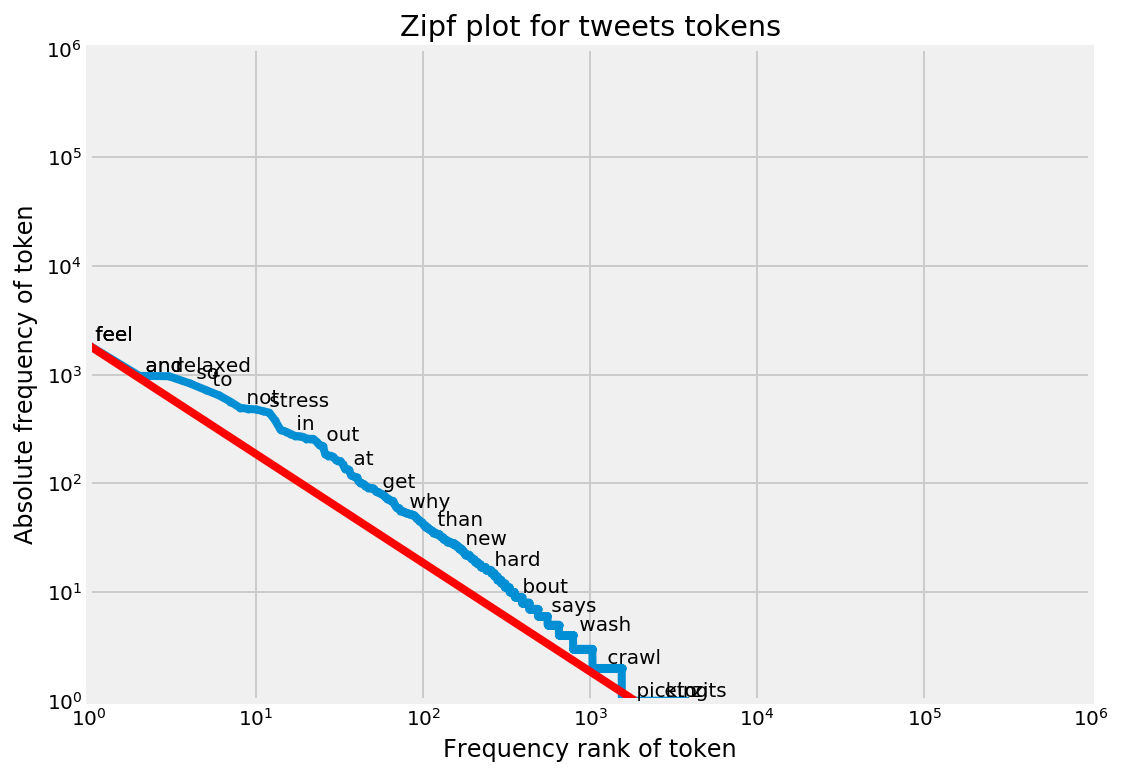

In [0]:
##Log plot of Zipf's law
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")


In [0]:
####Removing Stop Words

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
document_matrix = cvec.transform(my_df.text)

In [0]:
#measuring time for computing count vectors for positive tweets

%%time
pos_batches = np.linspace(0,946,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

9 entries' term freuquency calculated
105 entries' term freuquency calculated
200 entries' term freuquency calculated
296 entries' term freuquency calculated
391 entries' term freuquency calculated
487 entries' term freuquency calculated
582 entries' term freuquency calculated
678 entries' term freuquency calculated
774 entries' term freuquency calculated
869 entries' term freuquency calculated
946 entries' term freuquency calculated
CPU times: user 22.5 ms, sys: 2.93 ms, total: 25.4 ms
Wall time: 25.8 ms


In [0]:
##Measuring time for computing count vectors for negative stress tweets

%%time 
neg_batches = np.linspace(947,1906,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
      print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

956 entries' term freuquency calculated
1053 entries' term freuquency calculated
1150 entries' term freuquency calculated
1247 entries' term freuquency calculated
1344 entries' term freuquency calculated
1441 entries' term freuquency calculated
1537 entries' term freuquency calculated
1634 entries' term freuquency calculated
1731 entries' term freuquency calculated
1828 entries' term freuquency calculated
1906 entries' term freuquency calculated
CPU times: user 36.4 ms, sys: 4.07 ms, total: 40.5 ms
Wall time: 47.8 ms


In [0]:
#After removing stop words
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
feel,941,911,1852
relaxed,957,8,965
stressed,15,549,564
stress,15,445,460
like,144,302,446
just,119,149,268
feels,62,71,133
good,62,53,115
makes,70,31,101
today,56,42,98


Text(0.5, 1.0, 'Top 50 tokens in positive Stress tweets')

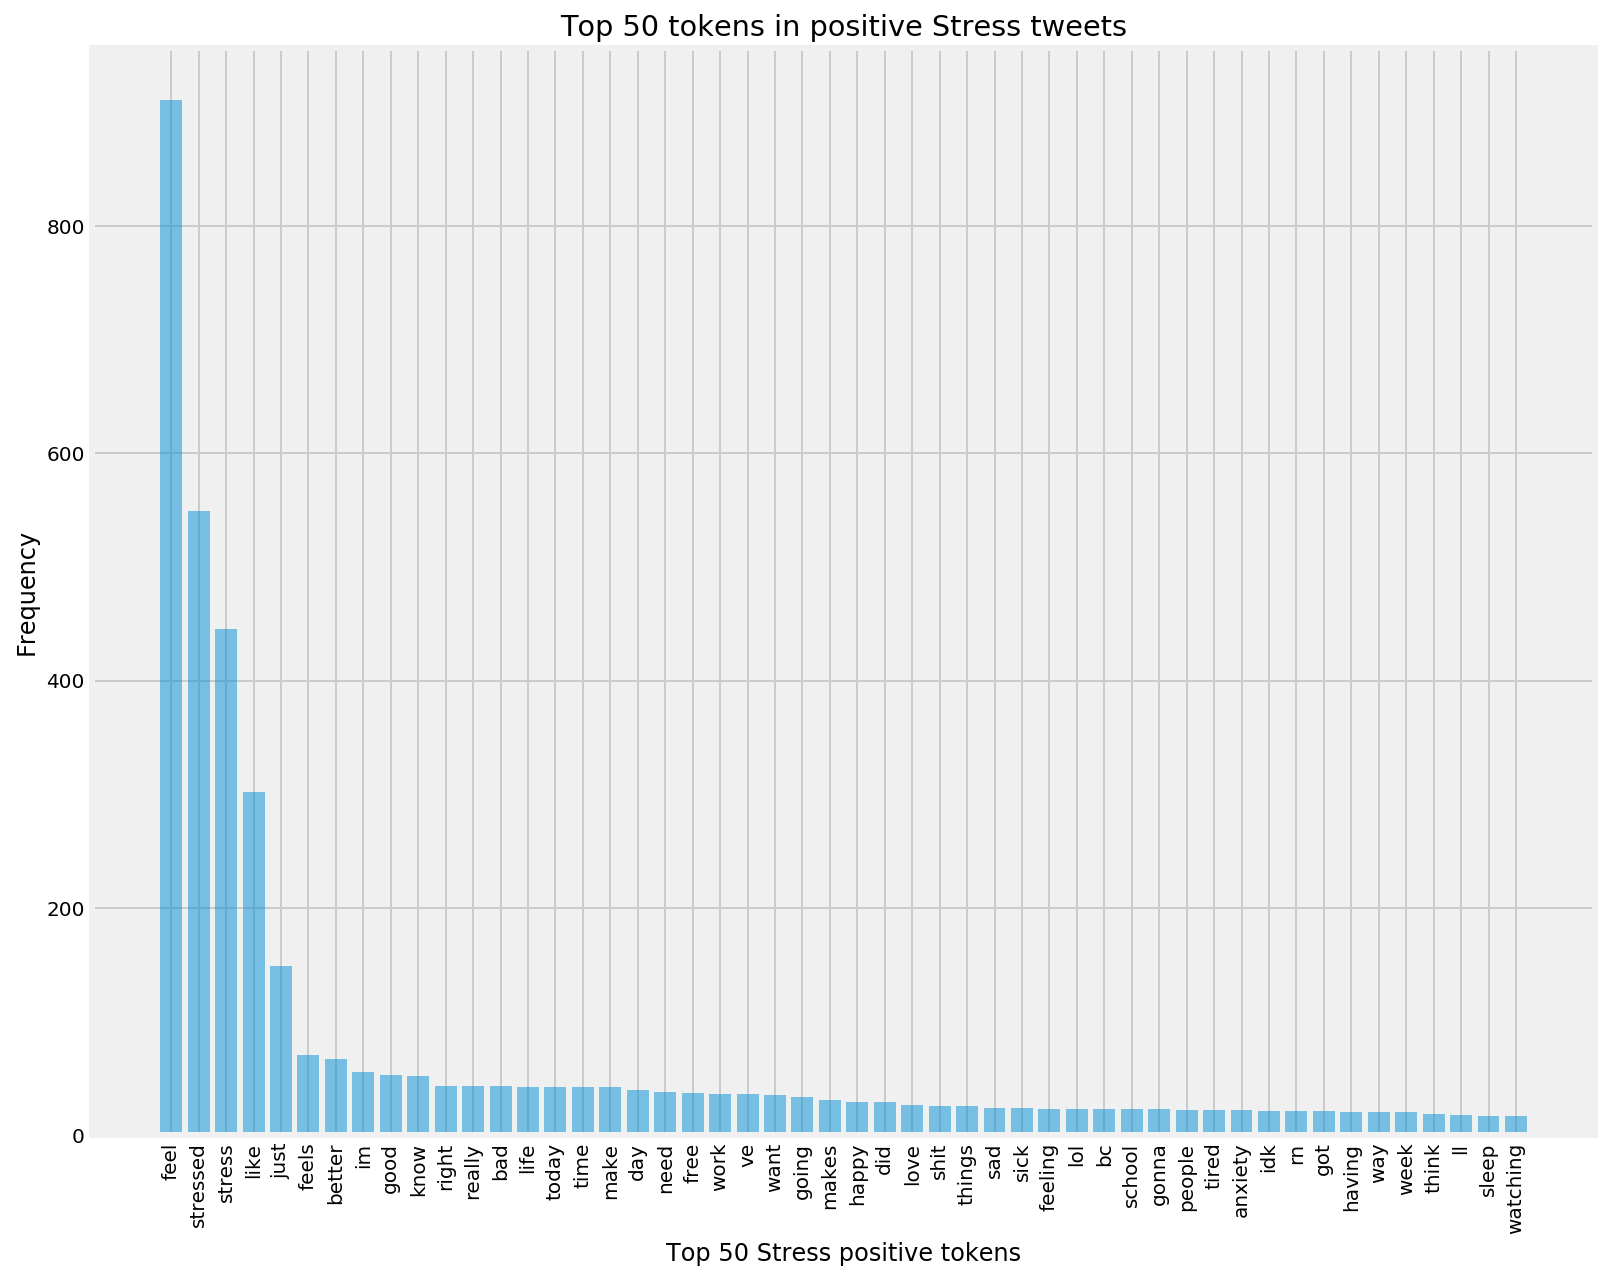

In [0]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 Stress positive tokens')
plt.title('Top 50 tokens in positive Stress tweets')

Text(0.5, 1.0, 'Top 50 tokens in negative stress tweets')

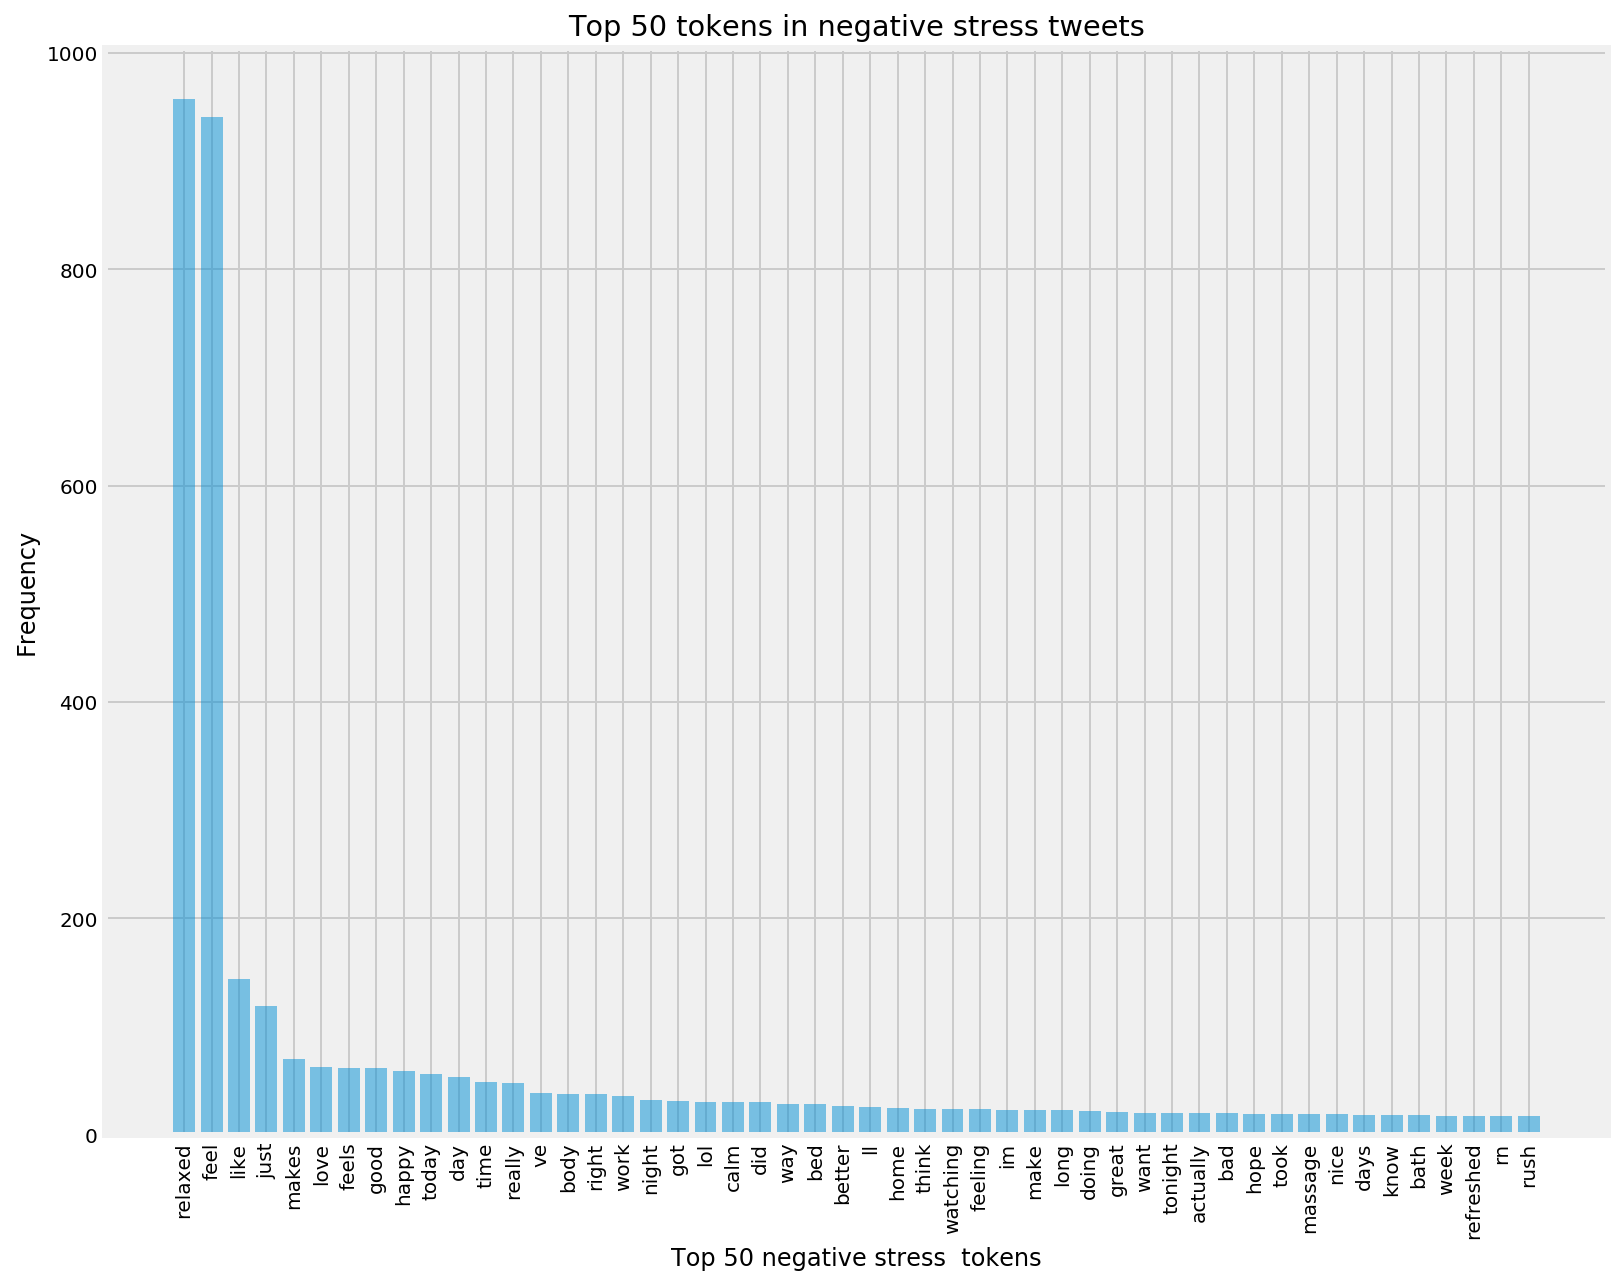

In [0]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative stress  tokens')
plt.title('Top 50 tokens in negative stress tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

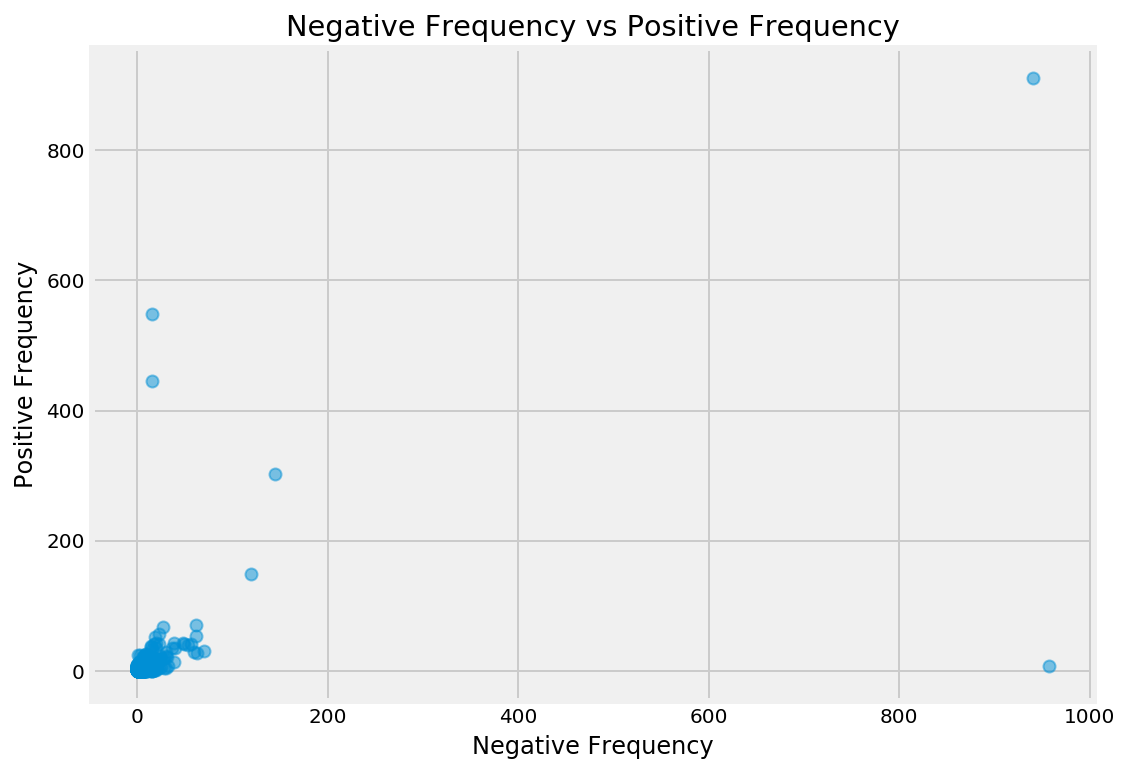

In [0]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [0]:
##Meaningful metrics for characterizing each token in each class

term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
aaa,0,1,1,1.0
logic,0,1,1,1.0
luggage,0,1,1,1.0
luck,0,2,2,1.0
lucio,0,2,2,1.0
lucas,0,1,1,1.0
lubao,0,1,1,1.0
lt,0,1,1,1.0
loveliest,0,1,1,1.0
lose,0,2,2,1.0


In [0]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
feel,941,911,1852,0.491901,0.113676
stressed,15,549,564,0.973404,0.068505
stress,15,445,460,0.967391,0.055528
like,144,302,446,0.677130,0.037684
just,119,149,268,0.555970,0.018592
feels,62,71,133,0.533835,0.008859
better,27,67,94,0.712766,0.008360
im,23,56,79,0.708861,0.006988
good,62,53,115,0.460870,0.006613
know,18,52,70,0.742857,0.006489


In [0]:

#Harmonic mean with safe lambda expression

from scipy.stats import hmean
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
feel,941,911,1852,0.491901,0.113676,0.184675
stressed,15,549,564,0.973404,0.068505,0.128002
stress,15,445,460,0.967391,0.055528,0.105027
like,144,302,446,0.677130,0.037684,0.071395
just,119,149,268,0.555970,0.018592,0.035982
feels,62,71,133,0.533835,0.008859,0.017430
better,27,67,94,0.712766,0.008360,0.016527
im,23,56,79,0.708861,0.006988,0.013839
good,62,53,115,0.460870,0.006613,0.013040
know,18,52,70,0.742857,0.006489,0.012865


In [0]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])


term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:386: RuntimeWarning: invalid value encountered in greater
  if np.all(a > 0):


ValueError: ignored

In [0]:
count=0
for i in term_freq_df2.pos_rate_normcdf:
  if(i<=0.0):
    count+=1

count2=0
for i in term_freq_df2.pos_freq_pct_normcdf:
  if(i<=0.0):
    count2+=1


print(count, count2)

0 0


In [0]:
##Using lambada expression for safe evaluation

from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] =term_freq_df2.apply(lambda x: (hmean([x['pos_rate_normcdf'], x['pos_freq_pct_normcdf']])
                                                                   if x['pos_rate_normcdf'] > 0 and x['pos_freq_pct_normcdf'] > 0 
                                                                   else 0), axis=1)                    
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
stressed,15,549,564,0.973404,0.068505,0.128002,0.857173,1.000000,0.923094
stress,15,445,460,0.967391,0.055528,0.105027,0.854111,1.000000,0.921316
sad,1,24,25,0.960000,0.002995,0.005971,0.850287,0.854644,0.852460
sick,3,24,27,0.888889,0.002995,0.005969,0.810110,0.854644,0.831781
know,18,52,70,0.742857,0.006489,0.012865,0.709197,0.992190,0.827158
better,27,67,94,0.712766,0.008360,0.016527,0.685667,0.999175,0.813252
im,23,56,79,0.708861,0.006988,0.013839,0.682554,0.995501,0.809846
need,14,38,52,0.730769,0.004742,0.009422,0.699843,0.958817,0.809113
free,14,37,51,0.725490,0.004617,0.009175,0.695716,0.954343,0.804761
life,17,42,59,0.711864,0.005241,0.010405,0.684949,0.973293,0.804052


In [0]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate_normcdf'], x['neg_freq_pct_normcdf']])
                                                                   if x['neg_rate_normcdf'] > 0 and x['neg_freq_pct_normcdf'] > 0 
                                                                   else 0), axis=1)                  

term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
relaxed,957,8,965,0.008290,0.000998,0.001782,0.136725,0.609793,0.223368,0.991710,0.120332,0.214622,0.863275,1.000000,0.926621
calm,30,4,34,0.117647,0.000499,0.000994,0.197641,0.533605,0.288445,0.882353,0.003772,0.007512,0.802359,0.884860,0.841593
bed,28,5,33,0.151515,0.000624,0.001243,0.219413,0.552882,0.314153,0.848485,0.003521,0.007012,0.780587,0.867186,0.821611
night,32,8,40,0.200000,0.000998,0.001987,0.252858,0.609793,0.357482,0.800000,0.004024,0.008007,0.747142,0.900795,0.816805
body,38,13,51,0.254902,0.001622,0.003224,0.293742,0.699108,0.413673,0.745098,0.004778,0.009495,0.706258,0.938882,0.806123
massage,19,1,20,0.050000,0.000125,0.000249,0.158250,0.475481,0.237466,0.950000,0.002389,0.004766,0.841750,0.765511,0.801822
love,63,27,90,0.300000,0.003369,0.006663,0.329455,0.885395,0.480220,0.700000,0.007922,0.015666,0.670545,0.995682,0.801391
long,23,4,27,0.148148,0.000499,0.000995,0.217188,0.533605,0.308721,0.851852,0.002892,0.005764,0.782812,0.815154,0.798655
makes,70,31,101,0.306931,0.003868,0.007640,0.335095,0.918769,0.491082,0.693069,0.008802,0.017383,0.664905,0.998298,0.798187
home,25,6,31,0.193548,0.000749,0.001492,0.248258,0.572035,0.346248,0.806452,0.003143,0.006263,0.751742,0.837320,0.792227


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

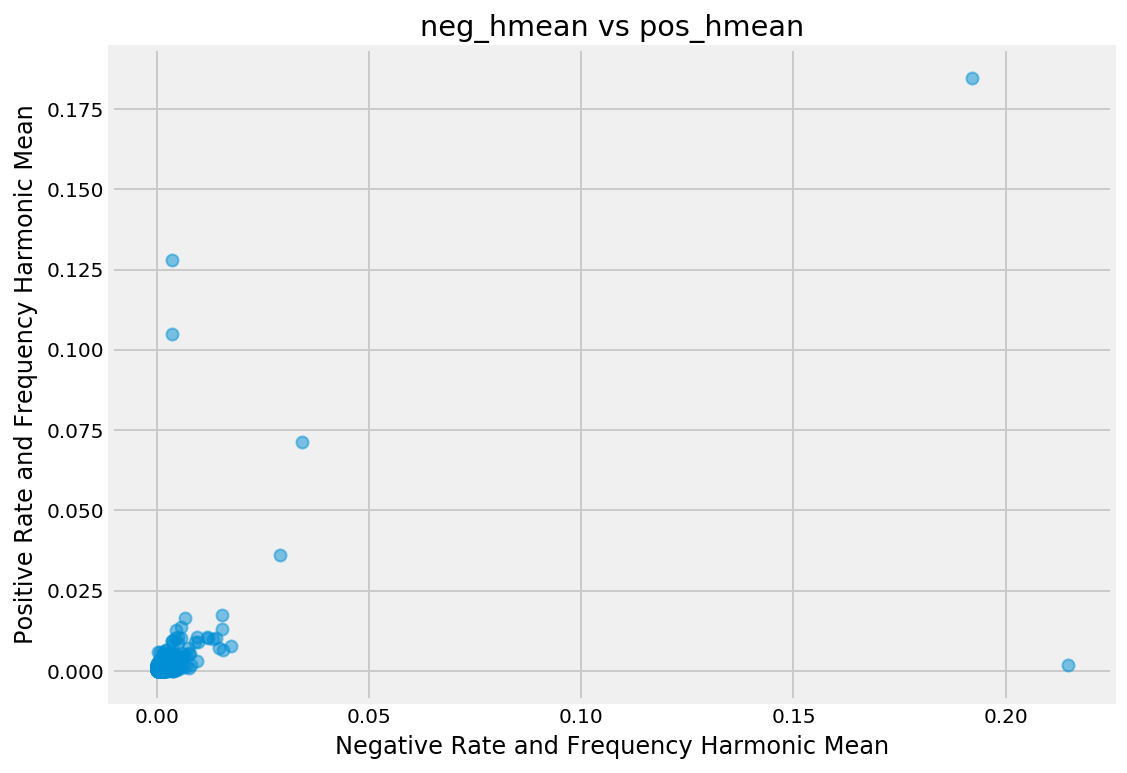

In [0]:

plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

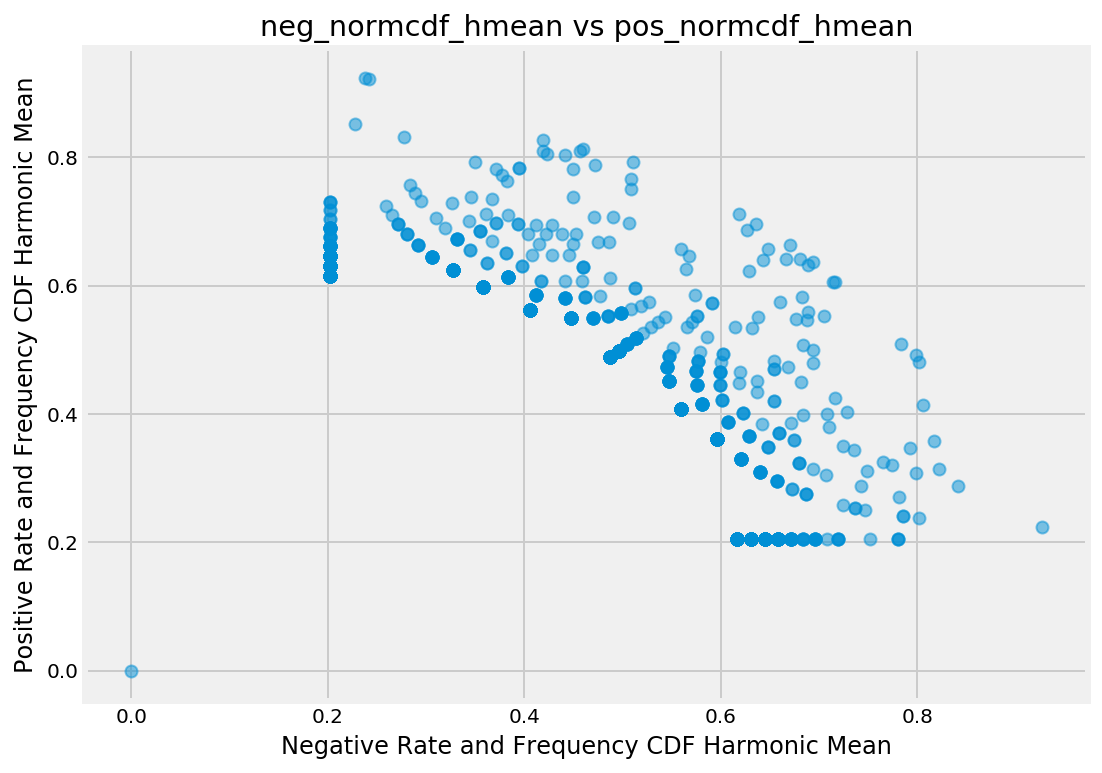

In [0]:
#Plotting cumulative df hmean of each class
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [0]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)